# 内容
### Sec 1. GALACTICNUCLEUSのデータを用いてbrighnessを見積もる  
http://vizier.nao.ac.jp/viz-bin/VizieR-3?-source=J/A%2bA/631/A20  
https://www.aanda.org/articles/aa/abs/2019/11/aa36263-19/aa36263-19.html  
### Sec 2.COBE 1.25um imageからwide-field fluxを見積もり、GALACTICNUCLEUSと比較  
https://irsa.ipac.caltech.edu/data/Planck/release_2/external-data/external_maps.html
### Sec 3.COBEデータとJASMINE catalogを比較  

### Sec 1. GALACTICNUCLEUSのデータを用いてbrighnessを見積もる  



In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import numpy as np
df= pd.read_csv("/Volumes/G-DRIVE/jasmine/gns_survey/J_A+A_631_A20/central.csv")
mask = df["Hmag"] < 30
df = df[mask]

###  GALACTICNUCLEUS central region
GALACTICNUCLEUSサーベイでは銀中付近のいくつかの領域でデータを取得している。  
中でも最もcentralな領域に限って解析をした。-0.15 < b< 0.11, -0.35 < l< 0.25くらいの領域を見ている

In [178]:
c = SkyCoord(df["ra"].values, df["dec"].values, frame="icrs", unit="deg")
gal_l = c.galactic.l.deg
gal_b = c.galactic.b.deg
gal_l[gal_l>180] -=360
lmin = np.min(gal_l)
lmax = np.max(gal_l)
bmin = np.min(gal_b)
bmax = np.max(gal_b)

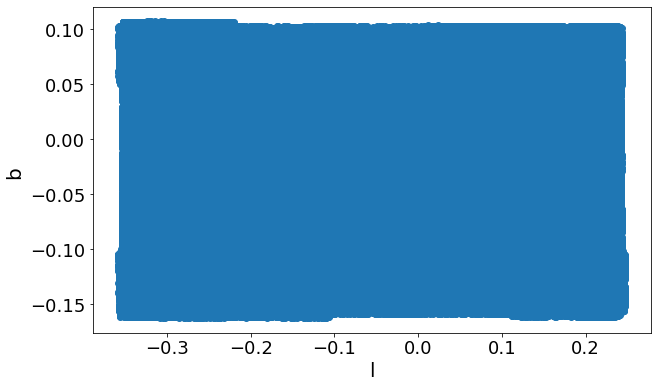

In [213]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(gal_l, gal_b )
plt.xlabel("l", fontsize = 20)
plt.ylabel("b ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


次に、H-magについて、個数のhistogramを作成してみる。  
16-20等くらいからなだらかになって、20-22等くらいでガクッとおちる

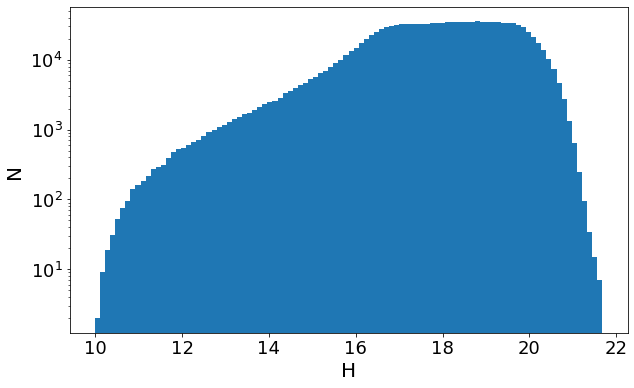

In [214]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df["Hmag"][mask ], bins =100)
plt.yscale("log")
plt.xlabel("H", fontsize = 20)
plt.ylabel("N ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

個数 * 明るさもplotした。  
これによると17等くらいからcontribtionが落ちるので背景星としては発散しないことが期待できる?  
と思ったが、以下で示すようにこれは問題があることがわかった。

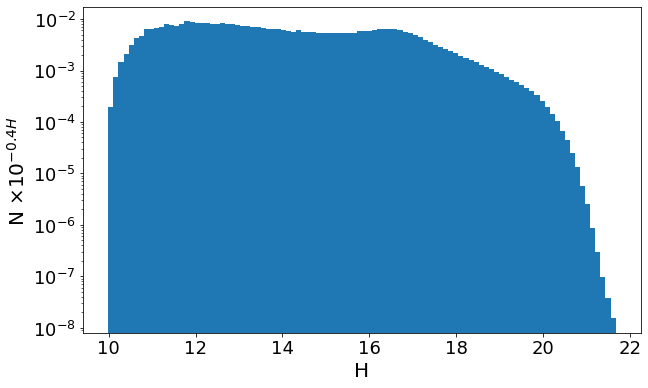

In [215]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df["Hmag"][mask ], weights = 10**(-0.4 * df["Hmag"][mask ]), bins =100)
plt.yscale("log")
plt.xlabel("H", fontsize = 20)
plt.ylabel("N $\\times 10^{-0.4 H }$ ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

次に等級ごとに位置の偏りがないかチェックをしてみた。  
結果として、暗い星に関してかなりの偏りがあることがわかった。以下ではH>18, H>20, H>21で順次plotした。

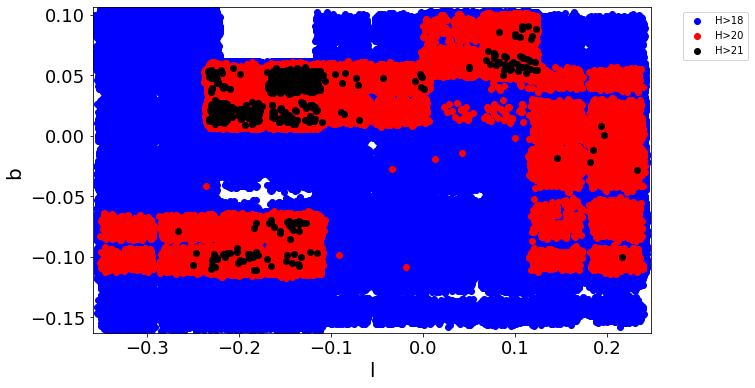

In [218]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(gal_l[df["Hmag"]>18], gal_b[df["Hmag"]>18], color="b", label="H>18" )
plt.scatter(gal_l[df["Hmag"]>20], gal_b[df["Hmag"]>20], color="r", label="H>20")
plt.scatter(gal_l[df["Hmag"]>21], gal_b[df["Hmag"]>21],color="k", label="H>21")
plt.xlim(lmin, lmax)
plt.ylim(bmin, bmax)
plt.xlabel("l", fontsize = 20)
plt.ylabel("b ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

明るい星に関してもplotしたが、こちらは比較的偏りが少ないことがわかった。以下ではH<16, H<12で順次plotした。

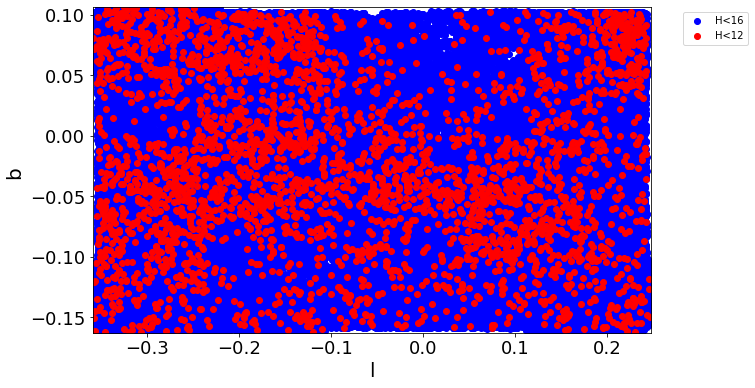

In [219]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(gal_l[df["Hmag"]<16], gal_b[df["Hmag"]<16], color="b" , label="H<16" )
plt.scatter(gal_l[df["Hmag"]<12], gal_b[df["Hmag"]<12], color="r", label="H<12"  )
plt.xlim(lmin, lmax)
plt.ylim(bmin, bmax)
plt.xlabel("l", fontsize = 20)
plt.ylabel("b ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

試しに暗い星まで写っている領域を拡大してplotしてみた。-0.17 < l < -0.11, 0.035 < b < 0.055

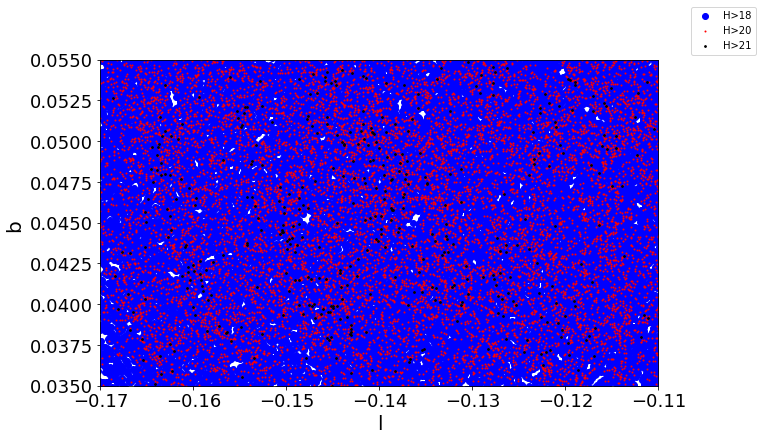

In [221]:

l_min_select = -0.17
l_max_select = -0.11
b_min_select = 0.035
b_max_select = 0.055

fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(gal_l[df["Hmag"]>18], gal_b[df["Hmag"]>18], color="b", label="H>18" )
plt.scatter(gal_l[df["Hmag"]>20], gal_b[df["Hmag"]>20], color="r", label="H>20", s =1)
plt.scatter(gal_l[df["Hmag"]>21], gal_b[df["Hmag"]>21],color="k", label="H>21", s =3)
plt.xlim(l_min_select, l_max_select )
plt.ylim(b_min_select,b_max_select)
plt.xlabel("l", fontsize = 20)
plt.ylabel("b ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Luminosity function 
この領域に限定してhistogramを作成してみた

In [225]:
mask_limited = (gal_l>l_min_select) * (gal_l<l_max_select) *  (gal_b>b_min_select) * (gal_b<b_max_select)
df_lim = df[mask_limited]

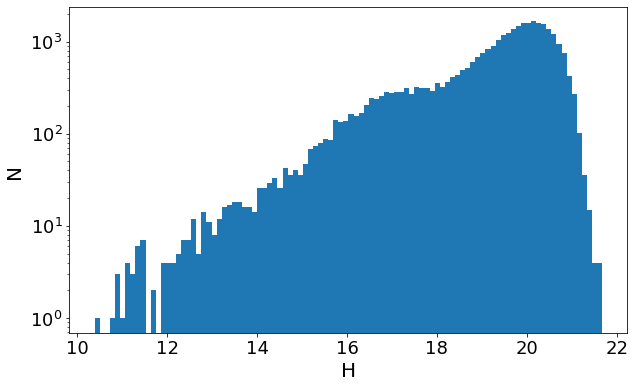

In [226]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df_lim["Hmag"], bins =100)
plt.yscale("log")
plt.yscale("log")
plt.xlabel("H", fontsize = 20)
plt.ylabel("N ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### Flux function 
先ほどとは違い、17-20等でなだらかになっていないことがわかる。  
以下に、個数*fluxの図を同様に示す。  
結果、20等くらいまでは単調に減っていないことがわかった。20等からは減少しているが、これは観測バイアスであろう。

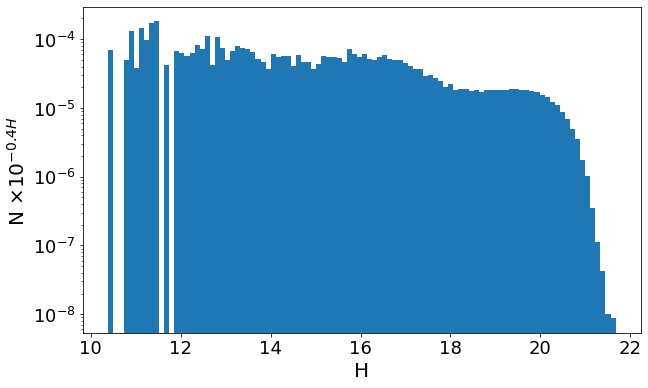

In [227]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df_lim["Hmag"], weights = 10**(-0.4 * df_lim["Hmag"]), bins =100)
plt.yscale("log")
plt.xlabel("H", fontsize = 20)
plt.ylabel("N $\\times 10^{-0.4 H }$ ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## HR diaram (H  & J-H)
この領域についてHR diagramを書いた。真ん中の斜め線はred clumpで16-18等付近で個数がほぼ一定であることを反映している。  
一方18-20等付近でまた塊があるように見え、21等以降はほぼ検出できていないように見える。

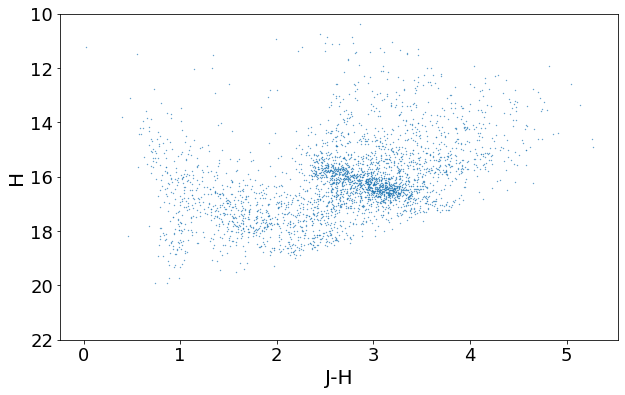

In [229]:
mask_mag = df_lim["Jmag"]<30

fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(df_lim["Jmag"][mask_mag]- df_lim["Hmag"][mask_mag], df_lim["Hmag"][mask_mag],s = 0.1)
plt.ylim(22,10)
plt.xlabel("J-H", fontsize = 20)
plt.ylabel("H", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### pseudo-J
上のHR図から、おおよそ$J=H+3$くらいであることがわかるので、J-magがない天体に関してはpeudo-Jを以下のように定義する  
  
$$
    pJ = H+3
$$  
これで、pJとJのhistogramを比較してみると、かねがねconsistentであることがわかる

/var/folders/mv/16fs748973b_b74f_xq38snm0000gn/T/ipykernel_56183/2448014325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["p_J"] = df_lim["Hmag"]+ 3
/var/folders/mv/16fs748973b_b74f_xq38snm0000gn/T/ipykernel_56183/2448014325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["p_J"][df_lim["Jmag"]<30] = df_lim["Jmag"][df_lim["Jmag"]<30]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

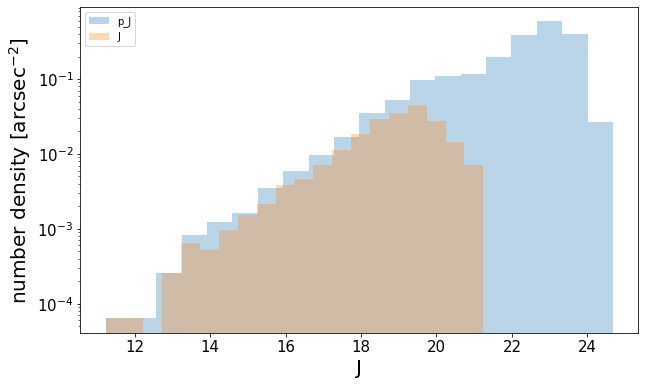

In [230]:
df_lim["p_J"] = df_lim["Hmag"]+ 3
df_lim["p_J"][df_lim["Jmag"]<30] = df_lim["Jmag"][df_lim["Jmag"]<30]
mask_j = df_lim["Jmag"]<30
area = (l_max_select- l_min_select) * 3600 * (b_max_select - b_min_select ) *3600
aperture_area = np.pi #arcsec^2

fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df_lim["p_J"], weights =  np.ones_like(df_lim["p_J"])/area, bins =20, label="p_J", alpha =0.3)
plt.hist(df_lim["Jmag"][mask_j], weights =  np.ones_like(df_lim["Jmag"][mask_j])/area, bins =20, label="J", alpha =0.3)
plt.yscale("log")
plt.yscale("log")
plt.xlabel("J", fontsize = 20)
plt.ylabel("number density [arcsec$^{-2}$]", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()


### pJの輝度
次にpJを用いてfluxを導出する。等級とフラックス[mJy]には以下の関係を用いる
  
$$
    F = 1.5 \times  10^{-0.4(J - 15)}\; {\rm mJy}
$$
  
すると、輝度 brightness [mJy/arcsec^2]は以下の式で与えられる
  
$$
    brightness (J) dJ = n(J) dJ\times 1.5 \times  10^{-0.4(J - 15)} 
$$
  
図を見てわかるように23くらいに限界等級があるものの、等級20-23くらいで有意に単調に減少していない。  
よって、23等よりも暗い星がある程度は排除できないことになる。 

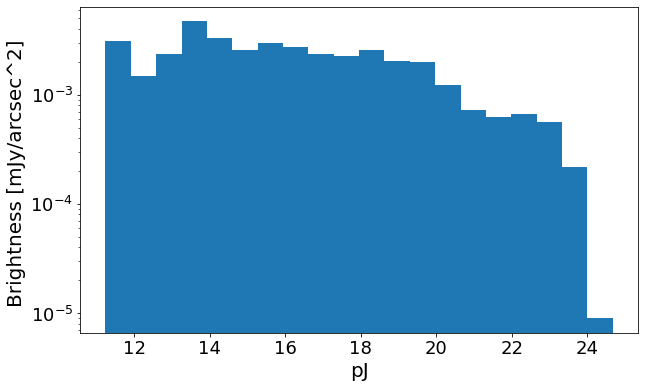

In [232]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
def mag_to_jy(mag):
    return 0.015 * 10**(-0.4 * (mag-20))
plt.hist(df_lim["p_J"], weights = mag_to_jy(df_lim["p_J"])/area, bins =20)
plt.yscale("log")
plt.xlabel("pJ", fontsize = 20)
plt.ylabel("Brightness [mJy/arcsec^2] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### 累積分布
上の図ではbin分けされた等級ごとのbrightnessをplotした。次に等級方向を積分した累積分布 (cdf)を表示する。  
まず、ある等級J'より明るい星の数N(J)は以下の通りになる
$$
    N (J')  = \int^{J'}_{-\infty}  n(J) dJ
$$

次にある等級J'より明るい星の輝度の累積分布は以下のように与えられる

$$
    {\rm cumulative \; brightness} (J')  = \int^{J'}_{-\infty}   n(J) dJ\times 1.5 \times  10^{-0.4(J - 15)} 
$$
同様にある等級J'よりくらい星の累積分布も計算できる (inv cdf)

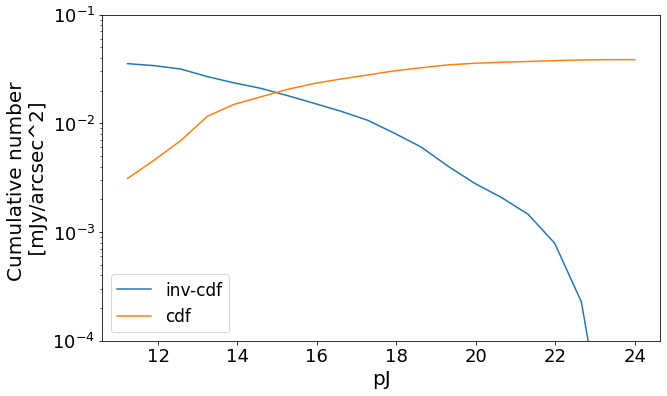

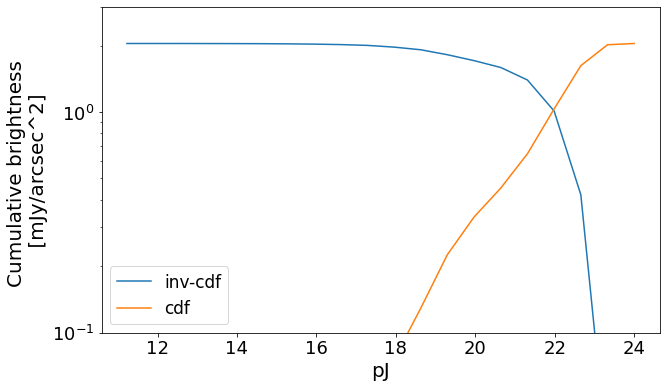

In [233]:
n_Jmag, base_Jmag = np.histogram(df_lim["p_J"], bins=20, weights = mag_to_jy(df_lim["p_J"])/area)
cum_Jmag = np.cumsum(n_Jmag)

fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.plot(base_Jmag[:-1],  np.sum(n_Jmag) - cum_Jmag, label="inv-cdf")
plt.plot(base_Jmag[:-1],  cum_Jmag, label="cdf")
plt.yscale("log")
plt.xlabel("pJ", fontsize = 20)
plt.ylabel("Cumulative number \n [mJy/arcsec^2] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-4, 0.1)
plt.legend(fontsize=17)
plt.show()

num_Jmag, base_num_Jmag = np.histogram(df_lim["p_J"], bins=20, weights = np.ones_like(df_lim["p_J"])/area)
cum_num_Jmag = np.cumsum(num_Jmag)
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.plot(base_num_Jmag[:-1],  np.sum(num_Jmag) - cum_num_Jmag, label="inv-cdf")
plt.plot(base_num_Jmag[:-1],  cum_num_Jmag, label="cdf")
plt.yscale("log")
plt.xlabel("pJ", fontsize = 20)
plt.ylabel("Cumulative brightness \n [mJy/arcsec^2] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-1, 3)
plt.legend(fontsize=17)
plt.show()


### 累積分布 for beam
これまではmJy/arcsec^2の単位であったが、apertureの面積$A$を考えてそこに入るfluxを計算する。  
以下では 
  
$$
A=3.14 {\rm arcsec}^2
$$
  
として計算した。 

20等より暗い星が平均で5天体程度以上、19-21等くらいの天体が少なくとも1天体くらいはapertureの中に入ってきている。  
また、20等以上の星をbackgroundとして数えると、0.07mJy/aperture程度の寄与がある

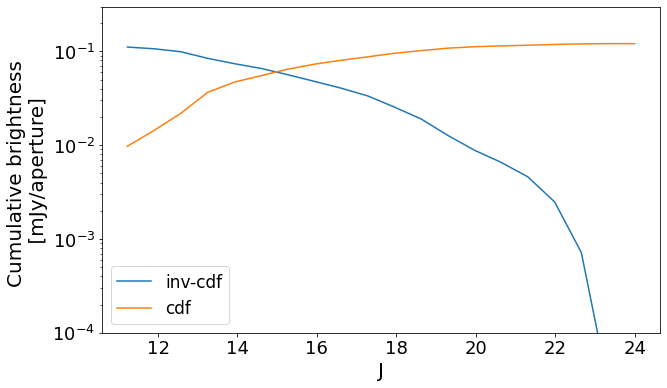

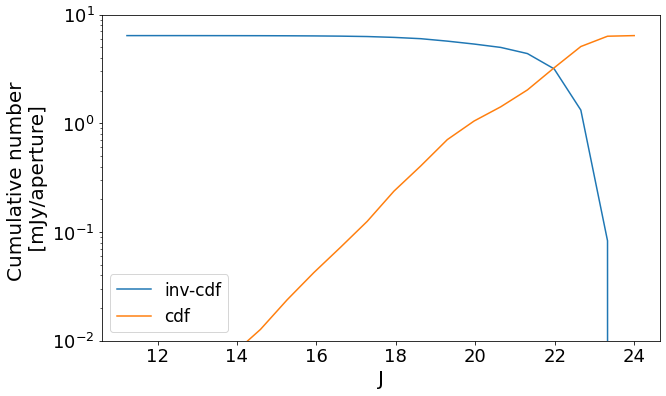

In [253]:
beam_size = 3.14 # arcsec^2
n_Jmag, base_Jmag = np.histogram(df_lim["p_J"], bins=20, weights = beam_size  * mag_to_jy(df_lim["p_J"])/area)
cum_Jmag = np.cumsum(n_Jmag)
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')


plt.plot(base_Jmag[:-1],  np.sum(n_Jmag) - cum_Jmag, label="inv-cdf")
plt.plot(base_Jmag[:-1],  cum_Jmag, label="cdf")
plt.yscale("log")
plt.xlabel("J", fontsize = 20)
plt.ylabel("Cumulative brightness \n [mJy/aperture] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-4, 0.3)
plt.legend(fontsize=17)
plt.show()

num_Jmag, base_num_Jmag = np.histogram(df_lim["p_J"], bins=20, weights = beam_size  * np.ones_like(df_lim["p_J"])/area)
cum_num_Jmag = np.cumsum(num_Jmag)
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.plot(base_num_Jmag[:-1],  np.sum(num_Jmag) - cum_num_Jmag, label="inv-cdf")
plt.plot(base_num_Jmag[:-1],  cum_num_Jmag, label="cdf")
plt.yscale("log")
plt.xlabel("J", fontsize = 20)
plt.ylabel("Cumulative number \n [mJy/aperture] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-2, 10)
plt.legend(fontsize=17)
plt.show()



### Sec 2.COBE 1.25um imageからwide-field fluxを見積もり、GALACTICNUCLEUSと比較  

COBEは0.7deg^2程度の分解能でskyのtotal fluxをよく推定しているとされている。  
以下ではzodiacal light subtracted imageの1.25$\mu m$ (J band)でのデータを持ってきて解析をした。  
https://irsa.ipac.caltech.edu/data/Planck/release_2/external-data/external_maps.html
  
まず全体像を示す

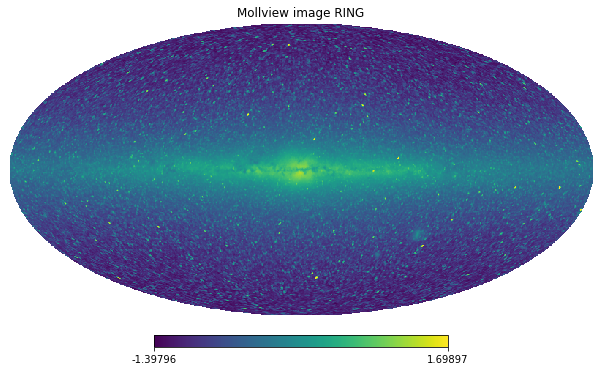

In [236]:
import healpy as hp
dibre_map = hp.fitsfunc.read_map("/Volumes/G-DRIVE/jasmine/COBE/healpy/DIRBE_ZSMA_1_256.fits")
dibre_map[dibre_map>50] =50
hp.mollview(np.log10(dibre_map), title="Mollview image RING")


## COBE 拡大
-1 deg < l < 1 deg, -1 deg < b < 1 degの領域を拡大してplotした。
上で解析していた領域では、0.093 mJy/arcsec^2

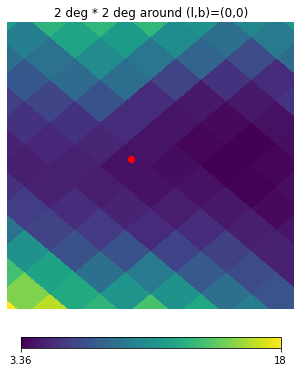

flux_cobe = 0.093137 mJy/arcsec^2


In [254]:
from healpy.newvisufunc import projview, newprojplot
lonra = [-1,1]
latra = [-1,1]
test=hp.cartview(dibre_map, return_projected_map=True, lonra=lonra, latra=latra)
#plt.imshow(test, origin='lower',extent=(lonra[1],lonra[0],latra[0],latra[1]), interpolation = 'none')
l_cen = 0.5 * (l_min_select + l_max_select)
b_cen = 0.5 * (b_min_select + b_max_select)

plt.scatter(l_cen, b_cen , color="r")
plt.title("2 deg * 2 deg around (l,b)=(0,0)")
plt.show()

unit_conv = 10**9 /(4.25 * 10**10)# MJy/str -> mJy/arcsec^2
flux_cobe = hp.get_interp_val(dibre_map,l_cen  * np.pi/180, b_cen * np.pi/180, lonlat = True) * unit_conv
print("flux_cobe = %f mJy/arcsec^2" % flux_cobe)

以下に先ほどのbrightnessとの比較を示す。

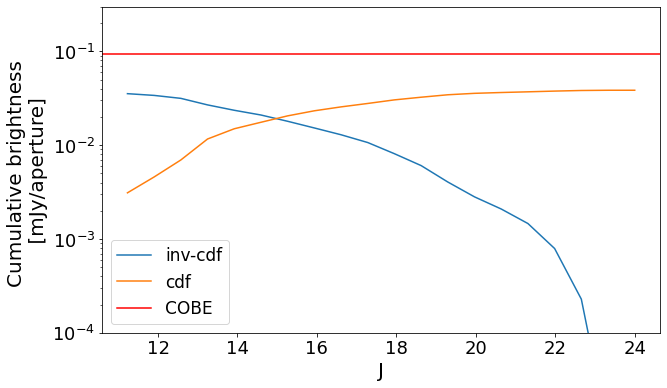

stellar flux =0.038533 mJy /arcsec^2
COBE flux    =0.093137 mJy /arcsec^2
missing flux =0.054604 mJy /arcsec^2


In [256]:
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
beam_size = 3.14 # arcsec^2
n_Jmag, base_Jmag = np.histogram(df_lim["p_J"], bins=20, weights = mag_to_jy(df_lim["p_J"])/area)
cum_Jmag = np.cumsum(n_Jmag)
plt.plot(base_Jmag[:-1],  np.sum(n_Jmag) - cum_Jmag, label="inv-cdf")
plt.plot(base_Jmag[:-1],  cum_Jmag, label="cdf")
plt.axhline(y=flux_cobe , color='r', linestyle='-', label="COBE")
plt.yscale("log")
plt.xlabel("J", fontsize = 20)
plt.ylabel("Cumulative brightness \n [mJy/aperture] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-4, 0.3)
plt.legend(fontsize=17)
plt.show()
print("stellar flux =%f mJy /arcsec^2" %( np.max(cum_Jmag)))
print("COBE flux    =%f mJy /arcsec^2" %( flux_cobe))
print("missing flux =%f mJy /arcsec^2" %( flux_cobe-np.max(cum_Jmag)))

### Sec 3.COBEデータとJASMINE catalogを比較  
上で注目した視野では星がすくないのかもしれない。そこでJASMINEの星をもってきて同様の計算を行う。

In [324]:
df_jasmine = pd.read_csv("/Volumes/G-DRIVE/jasmine/jasmine_catalog/all_table.csv")
glon = df_jasmine["glon"]
glat = df_jasmine["glat"]
mask_jasmine =df_jasmine["phot_j_mag"].notna() 



## brightness jasmine catlaog vs GNC
先ほどと同じ場所でのbrightnessを計算してみる  
だいたい一致している

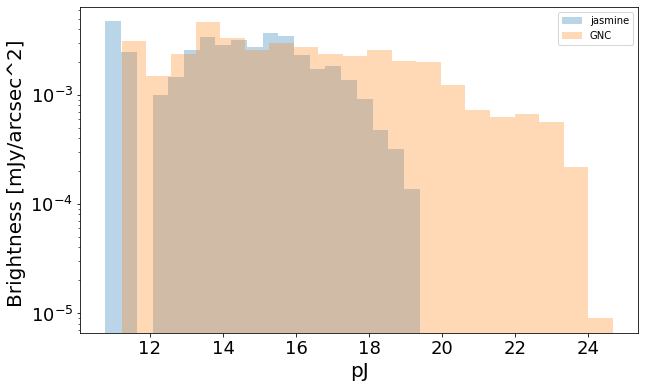

In [329]:
mask_region_same_as_gns = (glon>l_min_select) * (glon<l_max_select) *  (glat>b_min_select) * (glat<b_max_select)
df_lim_jas_same_as_gns = df_jasmine[mask_jasmine * mask_region_same_as_gns]




fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df_lim_jas_same_as_gns["phot_j_mag"], weights = mag_to_jy(df_lim_jas_same_as_gns["phot_j_mag"])/area, bins =20, alpha = 0.3, label="jasmine")
#plt.hist(df_lim_jas["phot_j_mag"], weights = mag_to_jy(df_lim_jas["phot_j_mag"])/area_jasmine, bins =20, alpha = 0.3, label="GALACTIC")
plt.hist(df_lim["p_J"], weights = mag_to_jy(df_lim["p_J"])/area, bins =20, alpha = 0.3, label="GNC")
plt.yscale("log")
plt.xlabel("pJ", fontsize = 20)
plt.ylabel("Brightness [mJy/arcsec^2] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()



## jasminine catalog (1deg^2)
次にjasmine catalogから -0.5deg < l < 0.5deg, -0.5deg< b < 0.5deg の星を全てもってきてplotする。  
だいたい1deg^2の広さの領域に対応 (~ COBEの分解能)。  

比較として、GNCの領域をplotした。明るい星がjasmine catalogではよく見つかっている。  
これはGNCで考えていた領域の星密度が少し少ないことと、領域が狭く明るい星がいなかったことに起因すると考えられる。

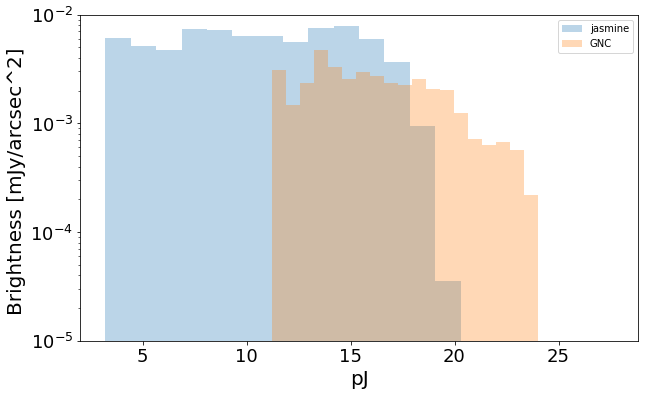

In [334]:

size = 0.5 ## area = 1arcsec^2
area_jasmine =  (2 * size * 3600)**2 ##arcesc^2
mask_region = (-size  < glon ) * (size  > glon ) *  (-size  < glat ) * (size  > glat )
df_lim_jas = df_jasmine[mask_jasmine * mask_region]
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.hist(df_lim_jas["phot_j_mag"], weights = mag_to_jy(df_lim_jas["phot_j_mag"])/area_jasmine, bins =20, alpha = 0.3, label="jasmine")
plt.hist(df_lim["p_J"], weights = mag_to_jy(df_lim["p_J"])/area, bins =20, alpha = 0.3, label="GNC")
plt.yscale("log")
plt.xlabel("pJ", fontsize = 20)
plt.ylabel("Brightness [mJy/arcsec^2] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.ylim(10**-5, 10**-2)
plt.show()


## COBEとJASMINE catalogの比較
先ほどと同様に1deg^2内でcumulative brightnessを計算した。  
結果として、広い領域を考えるとCOBEのfluxをかなり説明できることがわかった。  

jasmine merged catalogでは0.012mJy/arcsec^2程度説明できない寄与があるものの、これはjasmine catalogの検出限界が18等くらいで、それよりも暗い星の集団によって説明できるのではないかと考えられる。
GNCで見えていない暗い星の集団の明るさにもよるが、少なくともdiffuse emissionは0.01mJy/arcsec^2以下ではないかと推定できる。

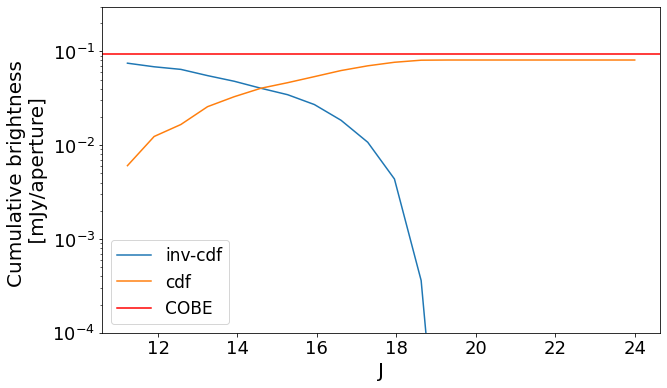

stellar flux =0.080926 mJy /arcsec^2
COBE flux    =0.093149 mJy /arcsec^2
missing flux =0.012223 mJy /arcsec^2


In [317]:
beam_size = 3.14 # arcsec^2
n_Jmag_jas, base_Jmag_jas = np.histogram(df_lim_jas["p_J"], bins=20, weights = mag_to_jy(df_lim_jas["p_J"])/area_jasmine )
cum_Jmag_jas = np.cumsum(n_Jmag_jas)
flux_cobe_jasmine = hp.get_interp_val(dibre_map,0, 0, lonlat = True) * unit_conv


fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.plot(base_Jmag[:-1],  np.sum(n_Jmag_jas) - cum_Jmag_jas, label="inv-cdf")
plt.plot(base_Jmag[:-1],  cum_Jmag_jas, label="cdf")
plt.axhline(y=flux_cobe , color='r', linestyle='-', label="COBE")
plt.yscale("log")
plt.xlabel("J", fontsize = 20)
plt.ylabel("Cumulative brightness \n [mJy/aperture] ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(10**-4, 0.3)
plt.legend(fontsize=17)
plt.show()
print("stellar flux =%f mJy /arcsec^2" %( np.max(cum_Jmag_jas)))
print("COBE flux    =%f mJy /arcsec^2" %( flux_cobe_jasmine))
print("missing flux =%f mJy /arcsec^2" %( flux_cobe_jasmine-np.max(cum_Jmag_jas)))